In [18]:
%load_ext autoreload
%autoreload 2
from model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Influence of `population_size`

### **Function** $x^2 + y^2 + 2z^2$

In [23]:
population_sizes = [10*i for i in range(1, 21)]
generations = 40
scope = [-10, 10]

pset_basic = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, BasicFunction(), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}", bar_stay=True)
    pset_basic.add(population)

size 200: 100%|████████████████████████████████| 40/40 [00:03<00:00, 10.21gen/s]


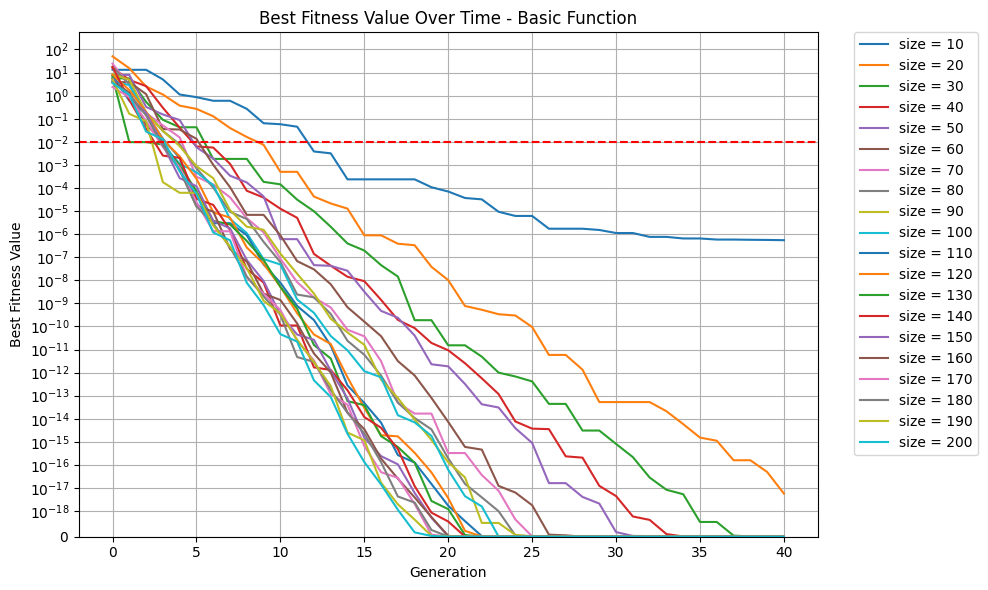

In [28]:
pset_basic.plot_best_values(title="Basic Function", log_scale=True, plot_precision=1e-18)

### **Rastrigin Function** with 5 dimensions

In [30]:
population_sizes = [10*i for i in range(1, 11)]
generations = 80
scope = [-10, 10]

pset_rastrigin = PopulationSet()
for population_size in population_sizes:
    population = Population(population_size, RastriginFunction(dim=5), scope, label=f"size = {population_size}")
    population.evolve(generations=generations, desc=f"size {population_size}")
    pset_rastrigin.add(population)

size 100: 100%|████████████████████████████████| 80/80 [00:03<00:00, 24.17gen/s]


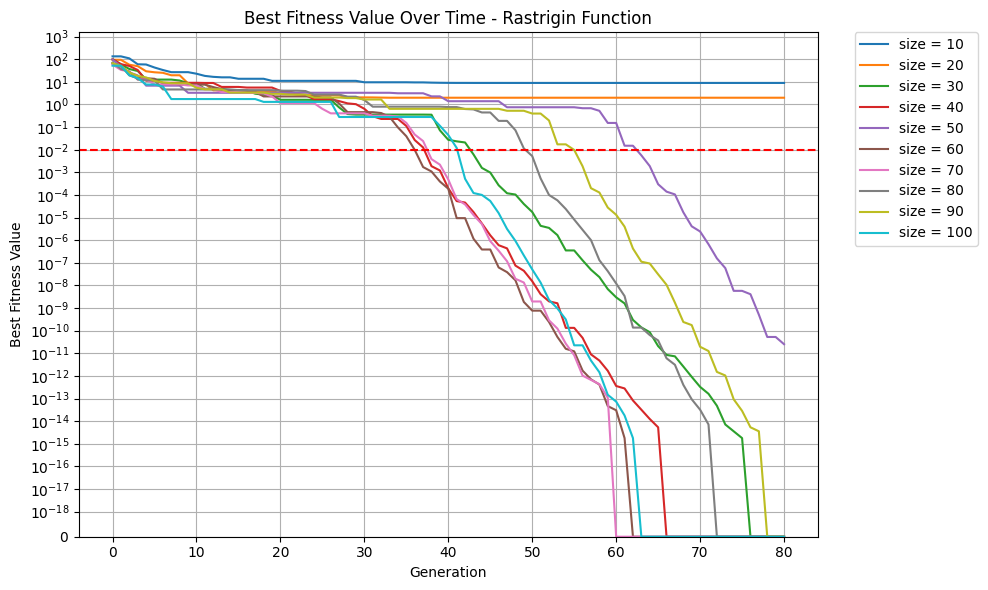

In [31]:
pset_rastrigin.plot_best_values(title="Rastrigin Function", log_scale=True, plot_precision=1e-18)

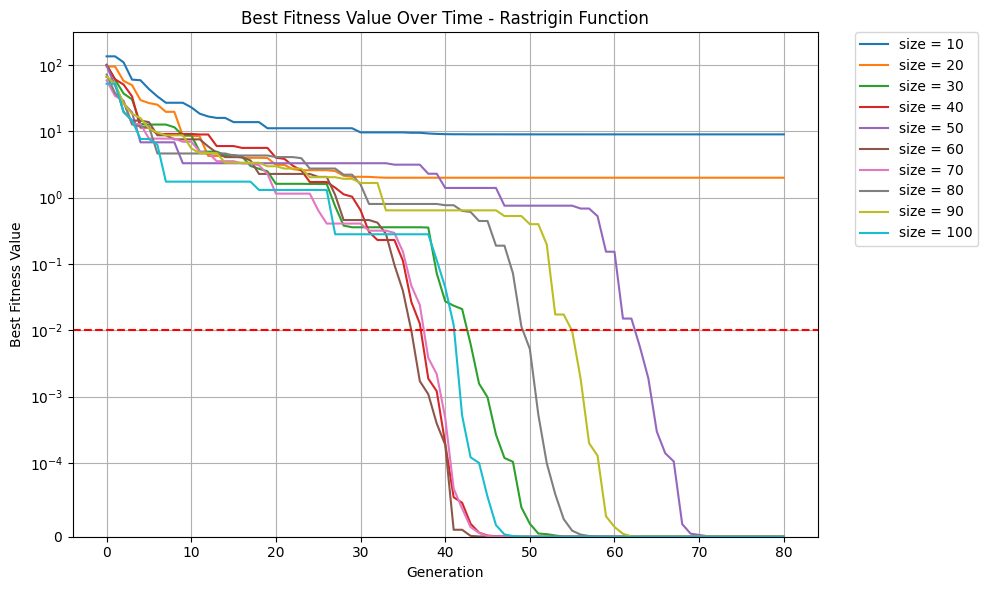

In [32]:
pset_rastrigin.plot_best_values(title="Rastrigin Function", log_scale=True, plot_precision=1e-4)